# 天竺鼠品種辨識

使用卷積神經網路（CNN）來識別不同品種的天竺鼠。 我們將使用 TensorFlow 和 Keras 為基礎，建立和訓練模型。 資料集位於 `./images` 目錄中，包括 Abyssinian、American、Silkie 和 Skinny 四個品種的天竺鼠圖片。

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

Dataset = './images'

## 資料準備

我們首先透過 Keras 的 `ImageDataGenerator` 來準備我們的資料，它可以幫助我們輕鬆從資料夾中載入、增強和預處理影像資料。

In [2]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(Dataset, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory(Dataset, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 1307 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


### 顯示部分資料集影像

我們可以透過以下程式碼來查看資料集中的一些圖像和它們對應的標籤。

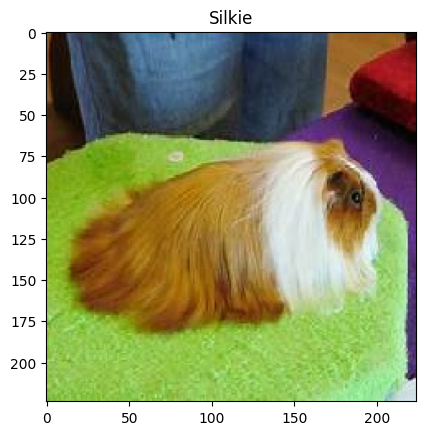

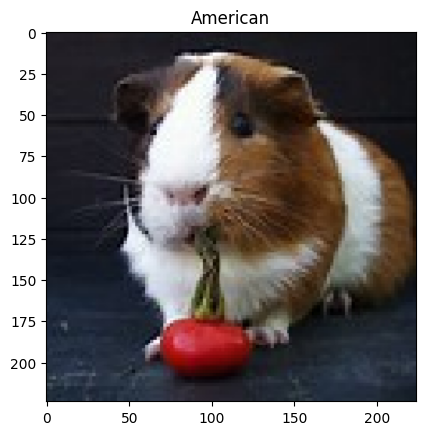

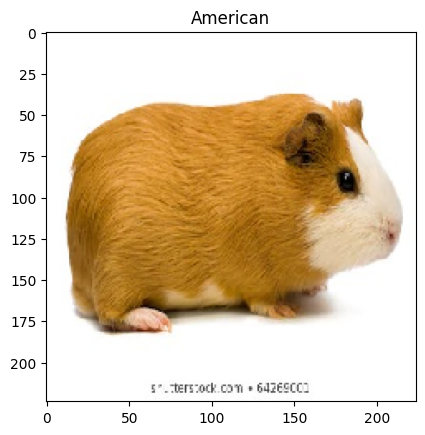

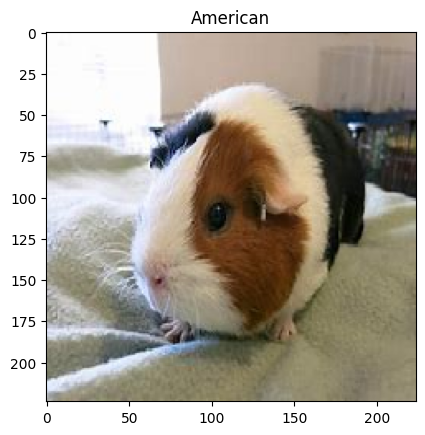

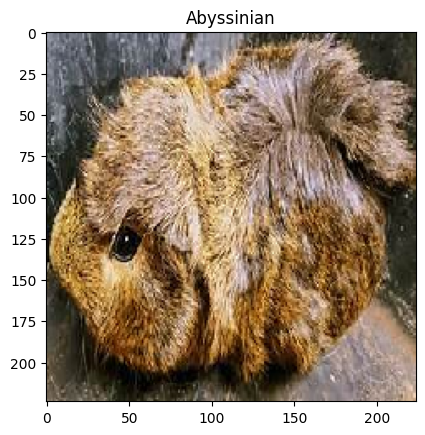

In [3]:
x_batch, y_batch = next(train_generator)

class_labels = ['Abyssinian', 'American', 'Silkie', 'Skinny']

for i in range(0, 5):
    image = x_batch[i]
    label = class_labels[np.argmax(y_batch[i])]
    plt.imshow(image)
    plt.title(label)
    plt.show()

## 建立和訓練模型

我們將使用預先訓練的 VGG16 模型作為基礎，加入一些自訂層來達成我們的分類任務。

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU found, using CPU instead.")

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

No GPU found, using CPU instead.
Epoch 1/10
 5/41 [==>...........................] - ETA: 7:19 - loss: 8.9515 - accuracy: 0.2937 

KeyboardInterrupt: 

## 建立和訓練模型

我們將使用預先訓練的 VGG16 模型作為基礎，加入一些自訂層來達成我們的分類任務。

### 訓練過程視覺化

我們可以繪製訓練和驗證的準確率和損失曲線，以了解模型在訓練過程中的表現。

In [ ]:
fig, axs = plt.subplots(2)

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

## 儲存模型

最後，我們將模型儲存到 `./model` 目錄中，以便於未來的使用和部署。

In [ ]:
model.save('./model')